In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

import sys
import os
from sklearn.model_selection import train_test_split
from PIL import Image
import os, glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [3]:
#트레인 데이타셋 레이블 구성

caltech_dir = "./data/hw5/train"
categories = ["adidas", "converse", "nike"]
nb_classes = len(categories)

image_w = 240
image_h = 240

pixels = image_h * image_w * 3

X = []
y = []

for idx, cat in enumerate(categories):
  
    image_dir = caltech_dir + "/" + cat
    files = glob.glob(image_dir+"/*.jpg")
    print(cat, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(cat)

        if i % 700 == 0:
            print(cat, " : ", f)

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)# 셔플을 해주기 위함 나중에 다시 합칠것이다.
xy = (X_train, X_test, y_train, y_test)
np.save("./data/hw5/shose_train.npy", xy)

adidas  파일 길이 :  237
adidas  :  ./data/hw5/train/adidas\100.jpg
converse  파일 길이 :  237
converse  :  ./data/hw5/train/converse\100.jpg
nike  파일 길이 :  237
nike  :  ./data/hw5/train/nike\100.jpg


In [4]:
# 테스트셋 전처리

caltech_dir = "./data/hw5/test"
categories = ["adidas", "converse", "nike"]
nb_classes = len(categories)

image_w = 240
image_h = 240

pixels = image_h * image_w * 3

X = []
y = []

for idx, cat in enumerate(categories):
    
    #one-hot 돌리기.
    

    image_dir = caltech_dir + "/" + cat
    files = glob.glob(image_dir+"/*.jpg")
    print(cat, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(cat)

        if i % 700 == 0:
            print(cat, " : ", f)

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True) # 셔플을 해주기 위함 나중에 다시 합칠것이다.
xy1 = (X_train, X_test, y_train, y_test)
np.save("./data/hw5/shose_test.npy", xy1)

adidas  파일 길이 :  38
adidas  :  ./data/hw5/test/adidas\0.jpg
converse  파일 길이 :  38
converse  :  ./data/hw5/test/converse\0.jpg
nike  파일 길이 :  38
nike  :  ./data/hw5/test/nike\0.jpg


In [26]:
# 기본 데이타 셋 확정

X_train, X_valid, y_train, y_valid = np.load("./data/hw5/shose_train.npy",allow_pickle=True)


X_test, X_2, y_test, y_2 = np.load("./data/hw5/shose_test.npy",allow_pickle=True)
X_test = np.append(X_test,X_2,axis=0)
y_test = np.append(y_test,y_2,axis=0)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

print(y_test)

(2400, 240, 240, 3)
(114, 240, 240, 3)
(600, 240, 240, 3)
(2400, 3)
(114, 3)
(600, 3)
[[1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1

In [4]:
# 라벨 원-핫 인코딩

from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
 
categories = ["adidas", "converse", "nike"]

token = Tokenizer()
token.fit_on_texts(y_test)

token1 = Tokenizer()
token1.fit_on_texts(y_train)

token2 = Tokenizer()
token2.fit_on_texts(y_valid)
#print('word index: {}'.format(token.word_index))
y_ = token.texts_to_sequences(y_test)
y_1 = token1.texts_to_sequences(y_train)
y_2 = token2.texts_to_sequences(y_valid)

y_test = tf.keras.utils.to_categorical(y_, len(token.word_index) +1 ) # 길이를 줘야하는데 벡터 맨 앞에 0이 필요해서 한 칸 더 추가.
y_train = tf.keras.utils.to_categorical(y_1, len(token1.word_index)+1 )
y_valid = tf.keras.utils.to_categorical(y_2, len(token2.word_index) +1)
# y_test = to_categorical(y_test)
# y_train = to_categorical(y_train)
# y_valid = to_categorical(y_valid)

print(y_test.shape)
print(y_train.shape)
print(type(y_valid))

(114, 4)
(639, 4)
<class 'numpy.ndarray'>


In [480]:
print(y_test)
y_test = y_test[:,1:]
y_train = y_train[:,1:]
y_valid = y_valid[:,1:]

print(y_test)

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0.

In [63]:
# 뻥튀기

train_data = ImageDataGenerator(
    rescale=1./255,
   

    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)
valid_data = ImageDataGenerator(
    rescale=1./255,
    )

In [83]:
X_train_gen = train_data.flow(x=X_train, y=y_train, batch_size=32, shuffle=True)
X_valid_gen= valid_data.flow(x=X_valid, y=y_valid)
X_test_gen = valid_data.flow(x=X_test, y=y_test )

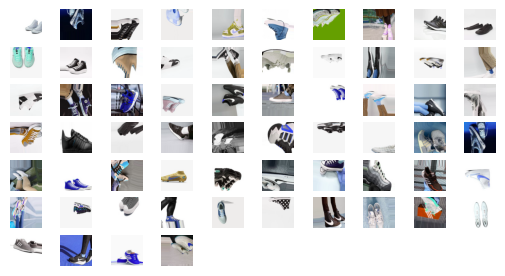

In [65]:
import cv2
augs = X_train_gen.__getitem__(8)

plt.figure()
for i, img in enumerate(augs[0]):
    plt.subplot(10, 10, i+1)
    plt.axis('off')

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img.squeeze())

AttributeError: 'NumpyArrayIterator' object has no attribute 'fit'

In [30]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (3, 3), input_shape = (240, 240, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 238, 238, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 119, 119, 16)     0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 119, 119, 16)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 117, 117, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 58, 58, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 58, 58, 32)       


Epoch 1: val_loss improved from inf to 0.49484, saving model to ./data/model\shose_cnn_best_model.hdf5

Epoch 2: val_loss improved from 0.49484 to 0.48252, saving model to ./data/model\shose_cnn_best_model.hdf5

Epoch 3: val_loss did not improve from 0.48252

Epoch 4: val_loss improved from 0.48252 to 0.48173, saving model to ./data/model\shose_cnn_best_model.hdf5

Epoch 5: val_loss did not improve from 0.48173

Epoch 6: val_loss did not improve from 0.48173

Epoch 7: val_loss improved from 0.48173 to 0.43675, saving model to ./data/model\shose_cnn_best_model.hdf5

Epoch 8: val_loss did not improve from 0.43675

Epoch 9: val_loss improved from 0.43675 to 0.41767, saving model to ./data/model\shose_cnn_best_model.hdf5

Epoch 10: val_loss did not improve from 0.41767

Epoch 11: val_loss did not improve from 0.41767

Epoch 12: val_loss did not improve from 0.41767

Epoch 13: val_loss did not improve from 0.41767

Epoch 14: val_loss did not improve from 0.41767
4/4 [======================

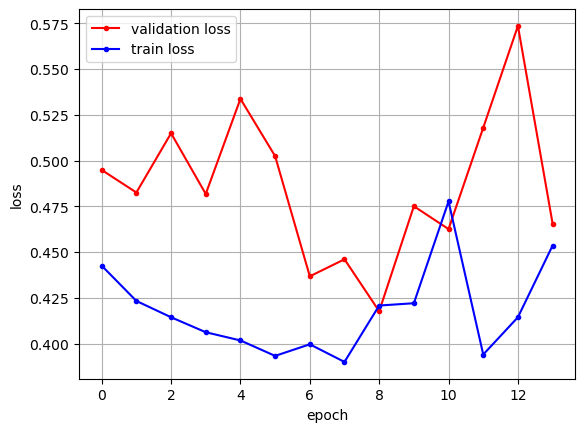

In [85]:
# 모델 구현 및 학습

# Simple deep learning model


modelpath = './data/model/shose_cnn_best_model.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 5)

history = model.fit(X_train_gen , validation_data = X_valid_gen, steps_per_epoch=75, epochs = 200,   verbose = 0, callbacks = [early_stopping_callback, checkpointer])
print("\n Test accuracy: {}.".format(model.evaluate(X_test_gen)))

y_vloss = history.history['val_loss'] # validation loss
y_loss = history.history['loss'] # train loss

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'validation loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'train loss')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [74]:
print("-- Evaluate --")
scores = model.evaluate_generator(X_test_gen)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --


C:\Users\box15\AppData\Local\Temp\ipykernel_964\1353341261.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(X_test_gen)


accuracy: 64.91%


In [38]:
# confusion matrix 사용을 위한 라이브러리
from sklearn.metrics import confusion_matrix
import itertools

# confusion matrix 그리는 함수 
def plot_confusion_matrix(con_mat, labels, title='Confusion Matrix', cmap=plt.cm.get_cmap('Blues'), normalize=False):
    plt.imshow(con_mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    marks = np.arange(len(labels))
    nlabels = []
    for k in range(len(con_mat)):
        n = sum(con_mat[k])
        nlabel = '{0}(n={1})'.format(labels[k],n)
        nlabels.append(nlabel)
    plt.xticks(marks, labels)
    plt.yticks(marks, nlabels)

    thresh = con_mat.max() / 2.
    if normalize:
        for i, j in itertools.product(range(con_mat.shape[0]), range(con_mat.shape[1])):
            plt.text(j, i, '{0}%'.format(round(con_mat[i, j] * 100 / n)), horizontalalignment="center", color="white" if con_mat[i, j] > thresh else "black")
    else:
        for i, j in itertools.product(range(con_mat.shape[0]), range(con_mat.shape[1])):
            plt.text(j, i, con_mat[i, j], horizontalalignment="center", color="white" if con_mat[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

4/4 [==============================] - 0s 21ms/step


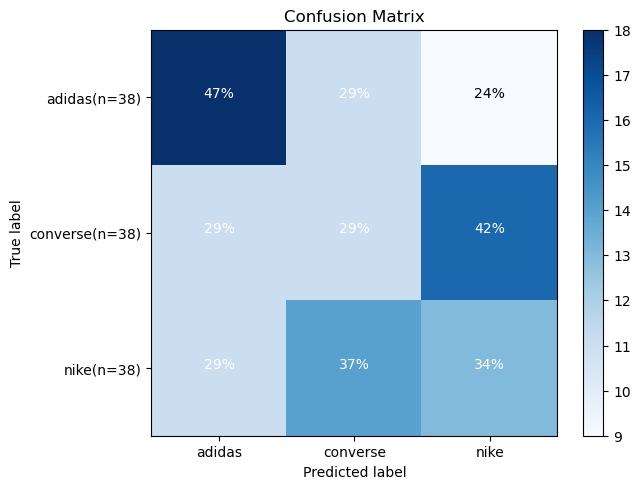

In [75]:
predictions = model.predict(X_test_gen)

# 예측값과 참값 
pred_labels = np.argmax(predictions, axis=1)
true_labels = y_test

y_label = true_labels.tolist()
Y=[]
for i , vt in enumerate(y_label):
    if vt == [1,0,0]:
        Y.append(0)
    elif vt == [0,1,0]:
        Y.append(1)
    else:
        Y.append(2)
Y = np.array(Y)

#메인 실행 
# confusion_matrix(true_labels, pred_labels)
plot_confusion_matrix(confusion_matrix(Y, pred_labels), labels=["adidas", "converse", "nike"], normalize=True)